# Bag of Words
In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity. 

### Load standard imports for NLP and plotting

In [5]:
import nltk  
import numpy as np  
import random  
import string, re
import seaborn as sns
import matplotlib.pyplot as plt
%pprint

/Users/francis/.pyenv/versions/3.7.1/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Pretty printing has been turned OFF


Load text file into an array with whitespace stripped

In [6]:
badguy = []
with open('data/badguy.txt') as f:
    badguy = [line.rstrip() for line in f]

In [7]:
badguy

['White shirt now red, my bloody nose', "Sleeping, you're on your tippy toes", 'Creeping around like no one knows', "Think you're so criminal", 'Bruises, on both my knees for you', "Don't say thank you or please", "I do what I want when I'm wanting to", 'My soul? So cynical', "So you're a tough guy", 'Like it really rough guy', "Just can't get enough guy", 'Chest always so puffed guy', "I'm that bad type", 'Make your mama sad type', 'Make your girlfriend mad tight', 'Might seduce your dad type', "I'm the bad guy, duh", "I'm the bad guy", 'I like it when you take control', "Even if you know that you don't", "Own me, I'll let you play the role", "I'll be your animal", 'My mommy likes to sing along with me', "But she won't sing this song", 'If she reads all the lyrics', "She'll pity the men I know", "So you're a tough guy", 'Like it really rough guy', "Just can't get enough guy", 'Chest always so puffed guy', "I'm that bad type", 'Make your mama sad type', 'Make your girlfriend mad tight'

Use **regex** to parse the corpus

In [8]:
parsed_corpus = [[re.sub('[^A-Za-z0-9]+', '', word) for word in sentence.split(" ")] for sentence in badguy]
parsed_corpus

[['White', 'shirt', 'now', 'red', 'my', 'bloody', 'nose'], ['Sleeping', 'youre', 'on', 'your', 'tippy', 'toes'], ['Creeping', 'around', 'like', 'no', 'one', 'knows'], ['Think', 'youre', 'so', 'criminal'], ['Bruises', 'on', 'both', 'my', 'knees', 'for', 'you'], ['Dont', 'say', 'thank', 'you', 'or', 'please'], ['I', 'do', 'what', 'I', 'want', 'when', 'Im', 'wanting', 'to'], ['My', 'soul', 'So', 'cynical'], ['So', 'youre', 'a', 'tough', 'guy'], ['Like', 'it', 'really', 'rough', 'guy'], ['Just', 'cant', 'get', 'enough', 'guy'], ['Chest', 'always', 'so', 'puffed', 'guy'], ['Im', 'that', 'bad', 'type'], ['Make', 'your', 'mama', 'sad', 'type'], ['Make', 'your', 'girlfriend', 'mad', 'tight'], ['Might', 'seduce', 'your', 'dad', 'type'], ['Im', 'the', 'bad', 'guy', 'duh'], ['Im', 'the', 'bad', 'guy'], ['I', 'like', 'it', 'when', 'you', 'take', 'control'], ['Even', 'if', 'you', 'know', 'that', 'you', 'dont'], ['Own', 'me', 'Ill', 'let', 'you', 'play', 'the', 'role'], ['Ill', 'be', 'your', 'animal

In [9]:
len(parsed_corpus)

46

Build a word frequency dictionary with words as keys and frequencies for values

In [10]:
wordfreq = {}
for sentence in parsed_corpus:
    for word in sentence:
        if word not in wordfreq.keys():
            wordfreq[word] = 1
        else:
            wordfreq[word] += 1

In [11]:
wordfreq.keys()

dict_keys(['White', 'shirt', 'now', 'red', 'my', 'bloody', 'nose', 'Sleeping', 'youre', 'on', 'your', 'tippy', 'toes', 'Creeping', 'around', 'like', 'no', 'one', 'knows', 'Think', 'so', 'criminal', 'Bruises', 'both', 'knees', 'for', 'you', 'Dont', 'say', 'thank', 'or', 'please', 'I', 'do', 'what', 'want', 'when', 'Im', 'wanting', 'to', 'My', 'soul', 'So', 'cynical', 'a', 'tough', 'guy', 'Like', 'it', 'really', 'rough', 'Just', 'cant', 'get', 'enough', 'Chest', 'always', 'puffed', 'that', 'bad', 'type', 'Make', 'mama', 'sad', 'girlfriend', 'mad', 'tight', 'Might', 'seduce', 'dad', 'the', 'duh', 'take', 'control', 'Even', 'if', 'know', 'dont', 'Own', 'me', 'Ill', 'let', 'play', 'role', 'be', 'animal', 'mommy', 'likes', 'sing', 'along', 'with', 'But', 'she', 'wont', 'this', 'song', 'If', 'reads', 'all', 'lyrics', 'Shell', 'pity', 'men', 'only', 'good', 'at', 'being', 'guess', 'pretty', 'glad', 'alone', 'You', 'said', 'shes', 'scared', 'of', 'mean', 'see', 'sees', 'maybe', 'its', 'cause', 

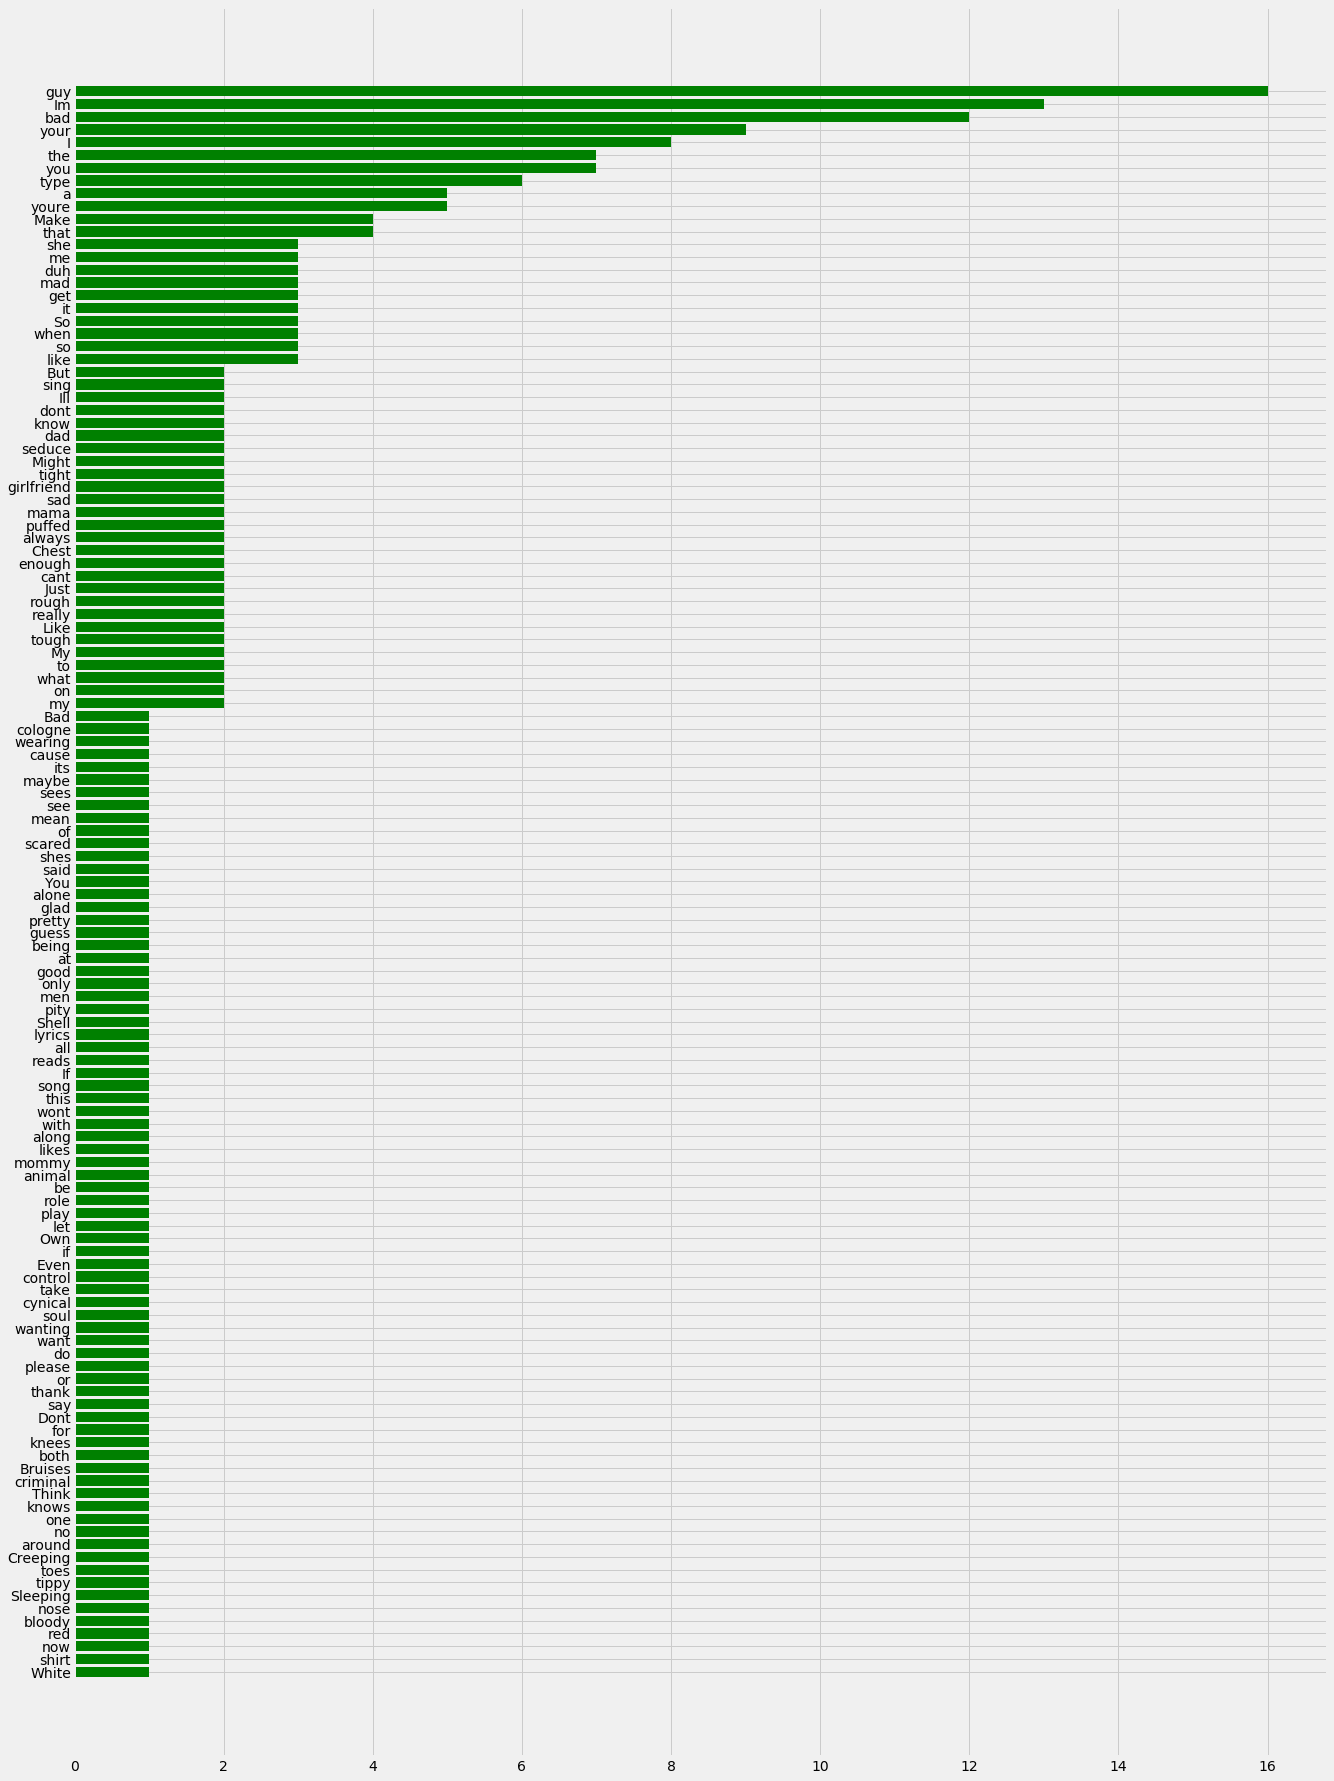

In [12]:
# Display a countplot
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,30))

wordfreq = {k: v for k, v in sorted(wordfreq.items(), key=lambda item: item[1])}
countplot = plt.barh([ str(i) for i in wordfreq.keys()], wordfreq.values(), color='g')

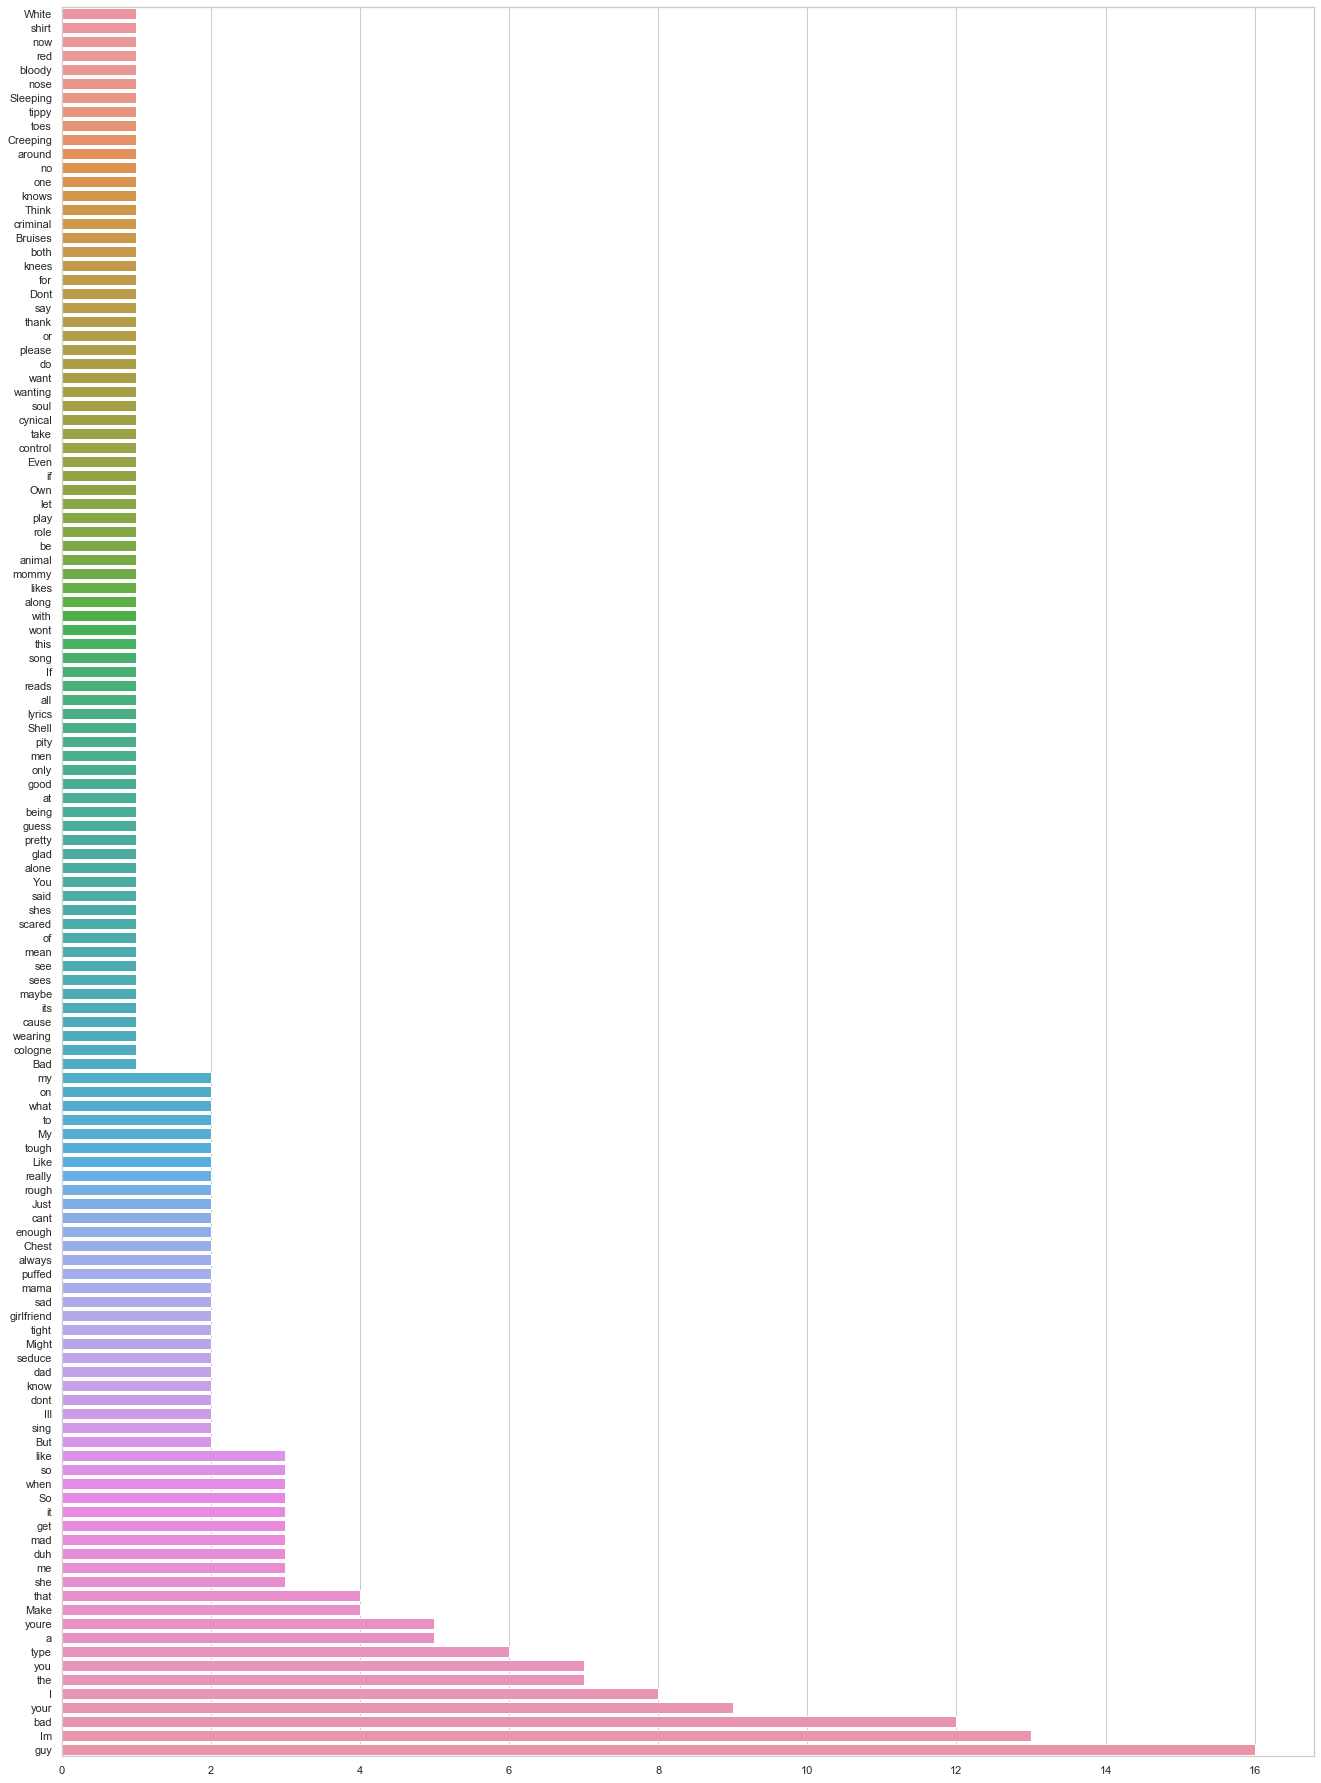

In [13]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(20,30))
ax = sns.barplot(x=list(wordfreq.values()), y=list(wordfreq.keys()))

In [14]:
# Get top 100 words
import heapq 

freq_words = heapq.nlargest(100, wordfreq, key=wordfreq.get)

In [15]:
freq_words

['guy', 'Im', 'bad', 'your', 'I', 'you', 'the', 'type', 'youre', 'a', 'that', 'Make', 'like', 'so', 'when', 'So', 'it', 'get', 'mad', 'duh', 'me', 'she', 'my', 'on', 'what', 'to', 'My', 'tough', 'Like', 'really', 'rough', 'Just', 'cant', 'enough', 'Chest', 'always', 'puffed', 'mama', 'sad', 'girlfriend', 'tight', 'Might', 'seduce', 'dad', 'know', 'dont', 'Ill', 'sing', 'But', 'White', 'shirt', 'now', 'red', 'bloody', 'nose', 'Sleeping', 'tippy', 'toes', 'Creeping', 'around', 'no', 'one', 'knows', 'Think', 'criminal', 'Bruises', 'both', 'knees', 'for', 'Dont', 'say', 'thank', 'or', 'please', 'do', 'want', 'wanting', 'soul', 'cynical', 'take', 'control', 'Even', 'if', 'Own', 'let', 'play', 'role', 'be', 'animal', 'mommy', 'likes', 'along', 'with', 'wont', 'this', 'song', 'If', 'reads', 'all', 'lyrics']

In [16]:
len(freq_words)

100

Build sentence vectors to wrap up Bag of Words development

In [17]:
sentence_vectors = []
for sentence in parsed_corpus:
    sent_vec = []
    for token in freq_words:
        if token in sentence:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sentence_vectors.append(sent_vec)

In [18]:
len(sentence_vectors[0])

100

In [20]:
sentence_vectors[3]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [21]:
freq_words

['guy', 'Im', 'bad', 'your', 'I', 'you', 'the', 'type', 'youre', 'a', 'that', 'Make', 'like', 'so', 'when', 'So', 'it', 'get', 'mad', 'duh', 'me', 'she', 'my', 'on', 'what', 'to', 'My', 'tough', 'Like', 'really', 'rough', 'Just', 'cant', 'enough', 'Chest', 'always', 'puffed', 'mama', 'sad', 'girlfriend', 'tight', 'Might', 'seduce', 'dad', 'know', 'dont', 'Ill', 'sing', 'But', 'White', 'shirt', 'now', 'red', 'bloody', 'nose', 'Sleeping', 'tippy', 'toes', 'Creeping', 'around', 'no', 'one', 'knows', 'Think', 'criminal', 'Bruises', 'both', 'knees', 'for', 'Dont', 'say', 'thank', 'or', 'please', 'do', 'want', 'wanting', 'soul', 'cynical', 'take', 'control', 'Even', 'if', 'Own', 'let', 'play', 'role', 'be', 'animal', 'mommy', 'likes', 'along', 'with', 'wont', 'this', 'song', 'If', 'reads', 'all', 'lyrics']

In [22]:
parsed_corpus[4]

['Bruises', 'on', 'both', 'my', 'knees', 'for', 'you']

## Cosine Similarity
Cosine similarity is the **cosine of the angle between two n-dimensional vectors** in an n-dimensional space. It is the **dot product of the two vectors divided by the product of the two vectors' lengths (or magnitudes)**.

In [23]:
print(badguy[43])
print(badguy[44])

I'm a bad guy
Bad guy, bad guy


Compare 2 sentence vectors and their similarities to each other

In [24]:
a = sentence_vectors[43]
b = sentence_vectors[44]

In [25]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([a],[b])

array([[0.70710678]])

In [26]:
badguy

['White shirt now red, my bloody nose', "Sleeping, you're on your tippy toes", 'Creeping around like no one knows', "Think you're so criminal", 'Bruises, on both my knees for you', "Don't say thank you or please", "I do what I want when I'm wanting to", 'My soul? So cynical', "So you're a tough guy", 'Like it really rough guy', "Just can't get enough guy", 'Chest always so puffed guy', "I'm that bad type", 'Make your mama sad type', 'Make your girlfriend mad tight', 'Might seduce your dad type', "I'm the bad guy, duh", "I'm the bad guy", 'I like it when you take control', "Even if you know that you don't", "Own me, I'll let you play the role", "I'll be your animal", 'My mommy likes to sing along with me', "But she won't sing this song", 'If she reads all the lyrics', "She'll pity the men I know", "So you're a tough guy", 'Like it really rough guy', "Just can't get enough guy", 'Chest always so puffed guy', "I'm that bad type", 'Make your mama sad type', 'Make your girlfriend mad tight'

# TF IDF: Term Frequency Inverse Document Frequency

In [40]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
sent_a = "Hey Jude, don't make it bad"
sent_b = "Hey Jude, don't be afraid"

In [42]:
bow_a = sent_a.split(' ')
bow_b = sent_b.split(' ')

In [43]:
unique = set(bow_a).union(set(bow_b))
unique

{'afraid', 'it', 'be', 'Jude,', 'Hey', 'bad', "don't", 'make'}

In [44]:
numwords_a = dict.fromkeys(uniqueWords, 0)

for word in bow_a:
    numwords_a[word] += 1
    
numwords_b = dict.fromkeys(uniqueWords, 0)

for word in bow_b:
    numwords_b[word] += 1

In [45]:
numwords_a

{'afraid': 0, 'it': 1, 'be': 0, 'Jude,': 1, 'Hey': 1, 'bad': 1, "don't": 1, 'make': 1}

In [46]:
numwords_b

{'afraid': 1, 'it': 0, 'be': 1, 'Jude,': 1, 'Hey': 1, 'bad': 0, "don't": 1, 'make': 0}

Limitation of BoW is that it doesn't weight words according to their relative information capacity. TFIDF takes care of that by weighting words by their inverse document frequency

### TLDR

TF = (Number of repetitions of word in a document) / (# of words in a document)

`"How many times is a word used in that entire document"`

IDF = Logarithm of [(Number of documents) / (Number of documents containing the word)]

`"IDF answers questions like how important is the word in the entire list of documents, is it a common theme in all the documents."`

1. Clean data / Preprocessing — Clean data (standardise data) , Normalize data( all lower case)
2. Tokenize words with frequency
3. Find TF for words
4. Find IDF for words
5. Vectorize vocab

In [47]:
def term_frequency(dictionary, bow):
    tf_dict = {}
    bow_count = len(bow)
    for word, count in dictionary.items():
        tf_dict[word] = count / float(bow_count)
    return tf_dict

In [55]:
tf_a = term_frequency(numwords_a, bow_a)
tf_b = term_frequency(numwords_b, bow_b)

tf_a

{'afraid': 0.0, 'it': 0.16666666666666666, 'be': 0.0, 'Jude,': 0.16666666666666666, 'Hey': 0.16666666666666666, 'bad': 0.16666666666666666, "don't": 0.16666666666666666, 'make': 0.16666666666666666}

In [51]:
import pandas as pd

In [62]:
data = {'tokens': list(unique), 'tf_a': list(tf_a.values()), 'tf_b': list(tf_b.values())}
tfdf = pd.DataFrame.from_dict(data)

In [63]:
tfdf

,tokens,tf_a,tf_b
0,afraid,0.000000,0.2
1,it,0.166667,0.0
2,be,0.000000,0.2
3,"Jude,",0.166667,0.2
4,Hey,0.166667,0.2
5,bad,0.166667,0.0
6,don't,0.166667,0.2
7,make,0.166667,0.0


In [64]:
import math

def idf(documents):
    n = len(documents)
    idf_dict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, val in document.items():
            if val > 0:
                idf_dict[word] += 1
    
    for word, val in idf_dict.items():
        idf_dict[word] = math.log(n / float(val))
    return idf_dict

In [65]:
idfs = idf([numwords_a, numwords_b])

In [66]:
idfs

{'afraid': 0.6931471805599453, 'it': 0.6931471805599453, 'be': 0.6931471805599453, 'Jude,': 0.0, 'Hey': 0.0, 'bad': 0.6931471805599453, "don't": 0.0, 'make': 0.6931471805599453}

In [69]:
def tfidf(tf_bow, idfs):
    tfidf = {}
    for word, val in tf_bow.items():
        tfidf[word] = val * idfs[word]
    return tfidf

In [70]:
tfidf_a = tfidf(tf_a, idfs)
tfidf_b = tfidf(tf_b, idfs)
df = pd.DataFrame([tfidf_a, tfidf_b])

In [71]:
df

,afraid,it,be,"Jude,",Hey,bad,don't,make
0,0.000000,0.115525,0.000000,0.0,0.0,0.115525,0.0,0.115525
1,0.138629,0.000000,0.138629,0.0,0.0,0.000000,0.0,0.000000
